# Multiple Linear Regression
## Bike Sharing Demand
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

### Problem Statement
- In this assignment I've have to build a multiple linear regression model for the prediction of demand for shared bikes.
- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
- The company wants to know:
    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands

## Reading Dataset

In [1]:
# Importing important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Library for ignoring Warnings
import warnings
warnings.filterwarnings('ignore')


# Library to display complete columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Read in the dataset
bike = pd.read_csv('day.csv')

# Printing first few records
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Cleaning

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### Infers
- Total 730 records/Rows and 16 Columns
- Number of float64 columns are 4, int64 columns are 11, and object columns are only 1.
- All columns has 730 records i.e. there is no Missing values
- Data type of `dteday` column has to be correct.
- `season`, `weekday` and `yr` columns has to be mapped with their actua meaning for analysing purpose
- Except `dteday` all the dataset columns are numeric type.

In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###### Infers
- All dataset has well structured i.e. it seems there is no outliers
- There "Mean" and "Median" are almost nearby i.e. they are well distributed data.

In [5]:
# Shape of the dataset
bike.shape

(730, 16)

In [6]:
# Null Values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

###### Mapping the Columns

In [7]:
# Mapping season column
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike['season'] = bike['season'].map(season_map)

# mapping yr column
year_map = {0:2018, 1:2019}
bike['yr'] = bike.yr.map(year_map)

# mapping weekdays columns
weekday_map = {0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}
bike['weekday'] = bike.weekday.map(weekday_map)

mnth_map = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'}
bike['mnth'] = bike['mnth'].map(mnth_map)

weathersit_map = {1:'Clear', 2:' Mist + Cloudy', 3:'Light Snow'}
bike['weathersit'] = bike['weathersit'].map(weathersit_map)

###### Changing datatype of the columns

In [8]:
# Converting "dteday" column into correct dtype

bike['dteday'] = pd.to_datetime(bike['dteday'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

###### Outliers treatment

<AxesSubplot:ylabel='Frequency'>

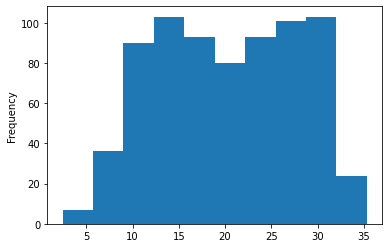

In [9]:
bike.temp.plot.hist()

<AxesSubplot:xlabel='registered'>

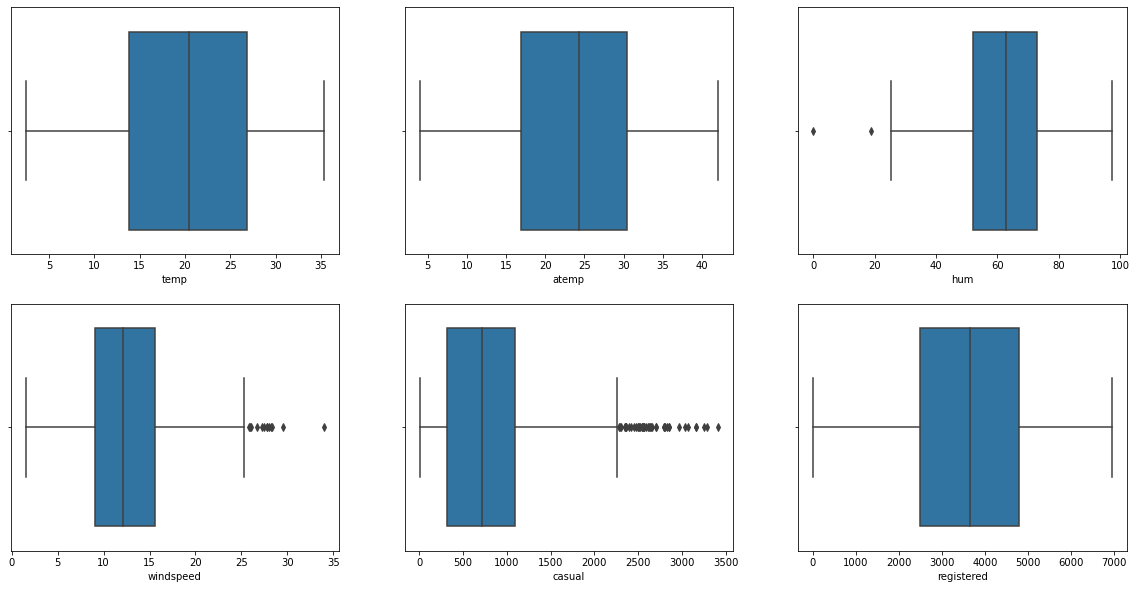

In [10]:
# Plotting box plot for all continuous columns

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(bike.temp)
plt.subplot(2,3,2)
sns.boxplot(bike.atemp)
plt.subplot(2,3,3)
sns.boxplot(bike.hum)
plt.subplot(2,3,4)
sns.boxplot(bike.windspeed)
plt.subplot(2,3,5)
sns.boxplot(bike.casual)
plt.subplot(2,3,6)
sns.boxplot(bike.registered)

## Univariate Analysis

##### 1. Categorical 

Text(0.5, 1.0, 'weather')

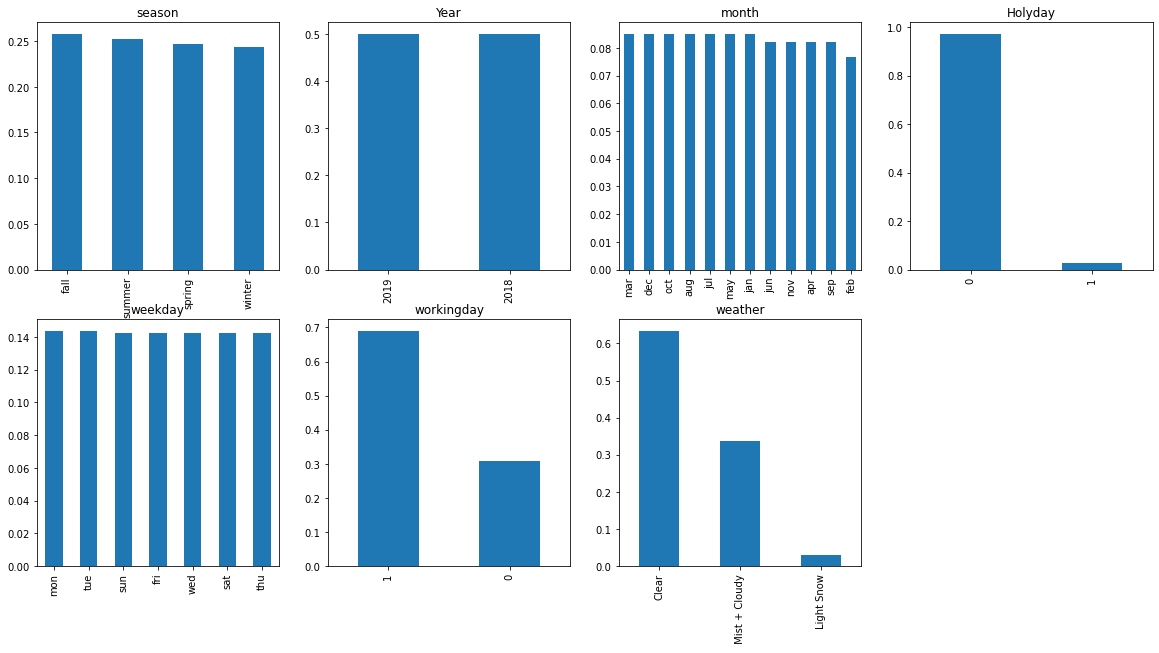

In [11]:
# "season"
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
bike.season.value_counts(normalize=True).plot.bar()
plt.title('season')

plt.subplot(2,4,2)
bike.yr.value_counts(normalize=True).plot.bar()
plt.title('Year')

plt.subplot(2,4,3)
bike.mnth.value_counts(normalize=True).plot.bar()
plt.title('month')

plt.subplot(2,4,4)
bike.holiday.value_counts(normalize=True).plot.bar()
plt.title('Holyday')

plt.subplot(2,4,5)
bike.weekday.value_counts(normalize=True).plot.bar()
plt.title('weekday')

plt.subplot(2,4,6)
bike.workingday.value_counts(normalize=True).plot.bar()
plt.title('workingday')

plt.subplot(2,4,7)
bike.weathersit.value_counts(normalize=True).plot.bar()
plt.title('weather')

###### Infers
- most of the records are of non-holidays days
- the number of records of working day is more than non-working days.
- similarly for weather columns most of the records are form Clear, Few clouds, Partly cloudy, Partly cloudy and then Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist and at the last very fewrecords for Light Snow, Light Rain + Thunderstorm + Scattered clouds, 


##### 2. Numeric

Text(0.5, 1.0, 'Total count')

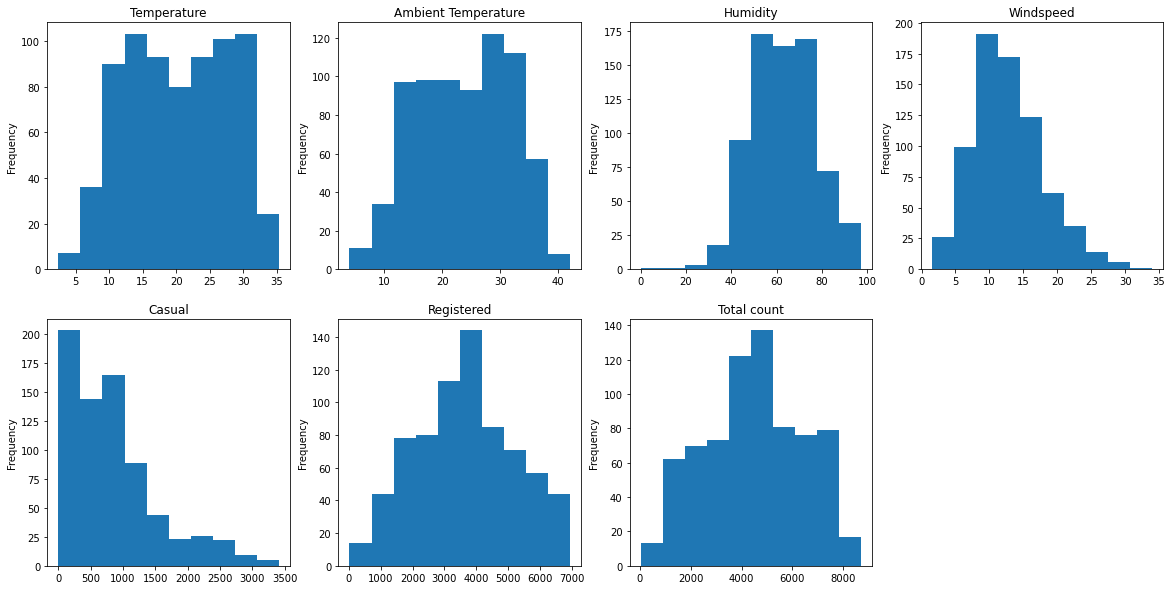

In [12]:
# Plotting histogram for continous data

plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
bike.temp.plot.hist()
plt.title('Temperature')

plt.subplot(2,4,2)
bike.atemp.plot.hist()
plt.title('Ambient Temperature')

plt.subplot(2,4,3)
bike.hum.plot.hist()
plt.title('Humidity')

plt.subplot(2,4,4)
bike.windspeed.plot.hist()
plt.title('Windspeed')

plt.subplot(2,4,5)
bike.casual.plot.hist()
plt.title('Casual')

plt.subplot(2,4,6)
bike.registered.plot.hist()
plt.title('Registered')

plt.subplot(2,4,7)
bike.cnt.plot.hist()
plt.title('Total count')

###### Infers
- The tempareature and ambient temperature are gernerally distributed from 10 to 30 in Celsius
- The distribution of humidity are concentrated in between 40 and 90
- Distribution of windspeed is around 5 to 20 
- and so on

## Bivariate Analysis

Text(0.5, 1.0, 'windspeed vs Count')

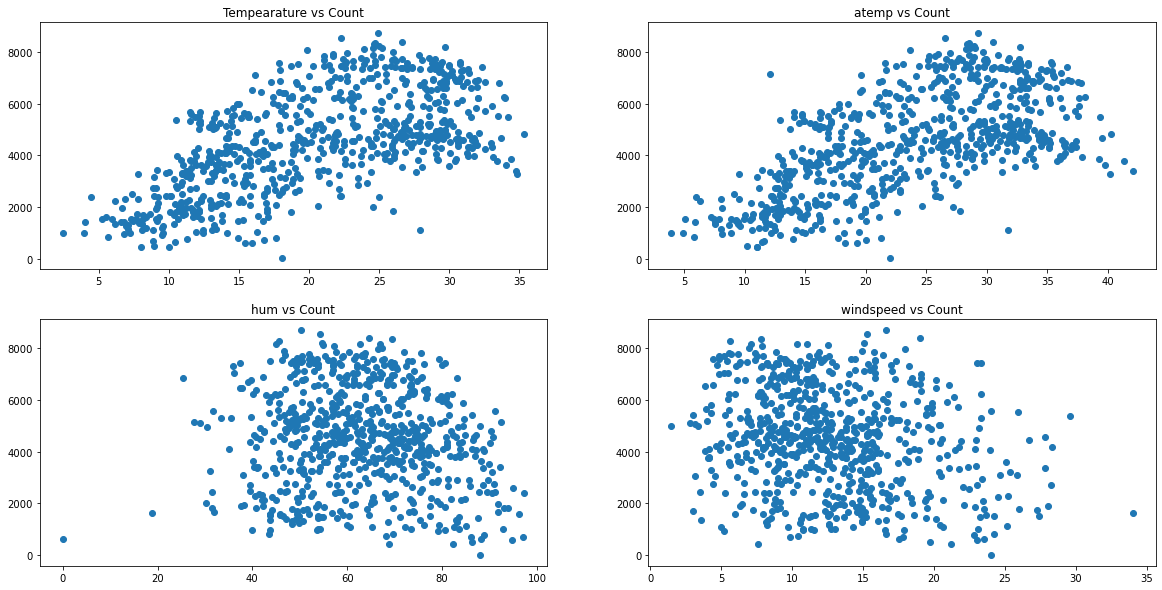

In [13]:
# Plotting Scatter plot of target variable vs independent variables 

plt.figure(figsize=(20,10))

# Plotting scatter plot for Tempearature vs Count
plt.subplot(2,2,1)
plt.scatter(data=bike, x='temp', y='cnt')
plt.title('Tempearature vs Count')

# Plotting scatter plot for atemp vs Count
plt.subplot(2,2,2)
plt.scatter(data=bike, x='atemp', y='cnt')
plt.title('atemp vs Count')

# Plotting scatter plot for hum vs Count
plt.subplot(2,2,3)
plt.scatter(data=bike, x='hum', y='cnt')
plt.title('hum vs Count')

# Plotting scatter plot for windspeed vs Count
plt.subplot(2,2,4)
plt.scatter(data=bike, x='windspeed', y='cnt')
plt.title('windspeed vs Count')



###### Infers
- As ambient temprature increase the count also increases as like temp vs cnt
- It showing that as the temperature increases the bike booking count also increases.
- Hum and wind speed does not show any strong relationship with cnt

###### # Season vs cnt

In [14]:
bike.groupby('season')['cnt'].sum()

season
fall      1061129
spring     469514
summer     918589
winter     841613
Name: cnt, dtype: int64

<AxesSubplot:xlabel='season'>

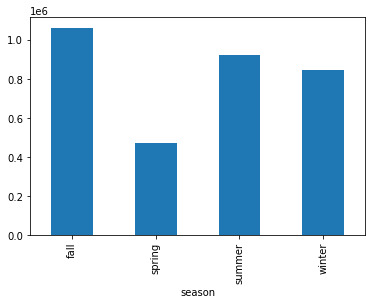

In [15]:
bike.groupby('season')['cnt'].sum().plot.bar()

###### Infers
- Here we can say that spring season is not good for the business
- The cnt is more in the middle of the year

###### yr vs cnt

In [16]:
bike.groupby('yr')['cnt'].sum()

yr
2018    1243103
2019    2047742
Name: cnt, dtype: int64

<AxesSubplot:xlabel='yr'>

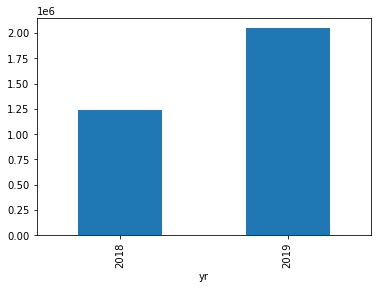

In [17]:
bike.groupby('yr')['cnt'].sum().plot.bar()

###### Infers
- 2019 has improved businees as compared to 2018

###### mnth vs cnt

In [18]:
bike.groupby('mnth')['cnt'].sum()

mnth
apr    269094
aug    351194
dec    211036
feb    149518
jan    134933
jul    344948
jun    346342
mar    228920
may    331686
nov    254831
oct    322352
sep    345991
Name: cnt, dtype: int64

<AxesSubplot:xlabel='mnth'>

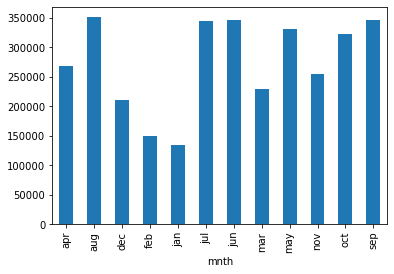

In [19]:
bike.groupby('mnth')['cnt'].sum().plot.bar()

###### Infers -
- In the middle of the year, the count is more
- THis justifies the season vs cnt relationship

###### holiday vs cnt

In [20]:
bike.groupby('holiday')['cnt'].sum()

holiday
0    3212410
1      78435
Name: cnt, dtype: int64

<AxesSubplot:xlabel='holiday'>

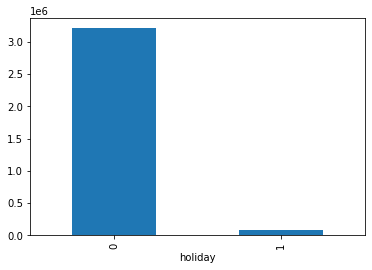

In [21]:
bike.groupby('holiday')['cnt'].sum().plot.bar()

###### Infers - 
- The counts are more in non-holidays days.

###### workingday vs cnt

In [22]:
bike.groupby('workingday')['cnt'].sum()

workingday
0    1036857
1    2253988
Name: cnt, dtype: int64

<AxesSubplot:xlabel='workingday'>

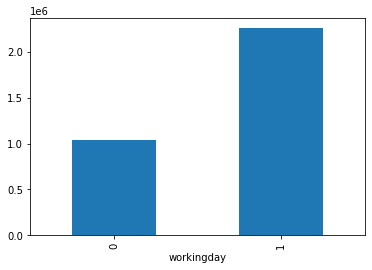

In [23]:
bike.groupby('workingday')['cnt'].sum().plot.bar()

###### Infers - 
- This justifies the Workingdays vs cnt plot
- This means people who is working, prefers more.

###### weathersit vs cnt

In [24]:
bike.groupby('weathersit')['cnt'].sum()

weathersit
 Mist + Cloudy     995024
Clear             2257952
Light Snow          37869
Name: cnt, dtype: int64

<AxesSubplot:xlabel='weathersit'>

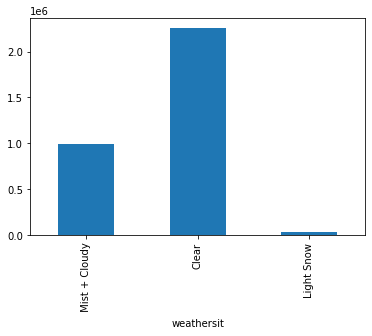

In [25]:
bike.groupby('weathersit')['cnt'].sum().plot.bar()

###### Infers -
- People likes to rent the bike in Clear, Few clouds, Partly cloudy, Partly cloudy atmosphere.
- or we can say that most probably people step out for working in such atmoshphere only.

In [26]:
bike.groupby('mnth')['cnt'].sum()

mnth
apr    269094
aug    351194
dec    211036
feb    149518
jan    134933
jul    344948
jun    346342
mar    228920
may    331686
nov    254831
oct    322352
sep    345991
Name: cnt, dtype: int64

In [27]:
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

<AxesSubplot:xlabel='mnth'>

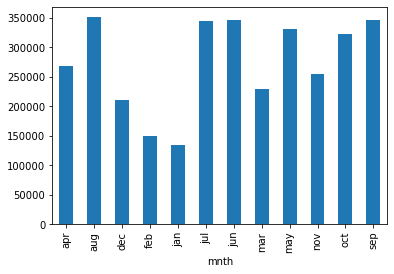

In [28]:
bike.groupby('mnth')['cnt'].sum().plot.bar()

## Multivariate Analysis

In [29]:
res = pd.pivot_table(data=bike, index='mnth', columns='workingday', values='cnt', aggfunc=np.mean)
res

workingday,0,1
mnth,,
apr,4759.388889,4367.261905
aug,5728.352941,5640.266667
dec,3389.095238,3411.341463
feb,2818.277778,2599.710526
jan,2364.578947,2093.162791
jul,5415.894737,5628.976744
jun,5787.736842,5765.243902
mar,3661.105263,3706.023256
may,5768.888889,5178.318182


<AxesSubplot:xlabel='workingday', ylabel='weathersit'>

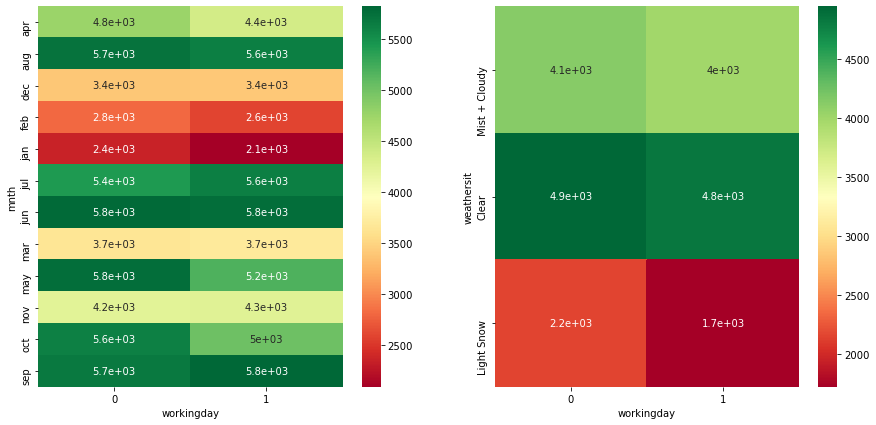

In [30]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
res = pd.pivot_table(data=bike, index='mnth', columns='workingday', values='cnt', aggfunc=np.mean)
sns.heatmap(res, annot=True, cmap='RdYlGn')

plt.subplot(1,2,2)
res = pd.pivot_table(data=bike, index='weathersit', columns='workingday', values='cnt', aggfunc=np.mean)
sns.heatmap(res, annot=True, cmap='RdYlGn')

###### Infers - 
- It shows that workingday has lesser green portion as compared to non-workingdays and for clear weather atmoshphere.


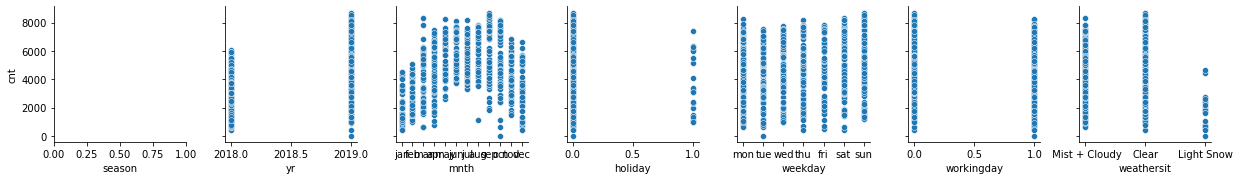

In [31]:
# Plotting pairplot
sns.pairplot(data=bike, x_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit'], y_vars='cnt')

##### Ploting Regression line for each variable

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

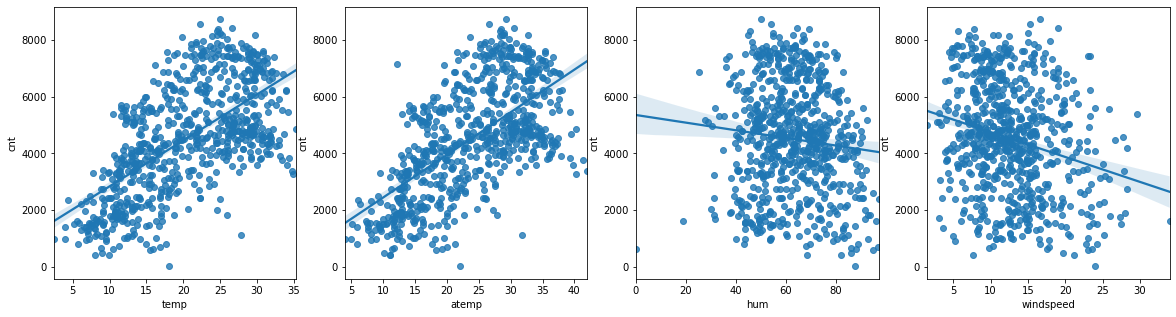

In [32]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.regplot('temp','cnt', data=bike )
plt.subplot(1,4,2)
sns.regplot('atemp','cnt', data=bike )
plt.subplot(1,4,3)
sns.regplot('hum','cnt', data=bike )
plt.subplot(1,4,4)
sns.regplot('windspeed','cnt', data=bike )

###### Infers -
- only Temperature and Ambient Temperature has linear relation with cnt.

##### Finding Correlationship

<AxesSubplot:>

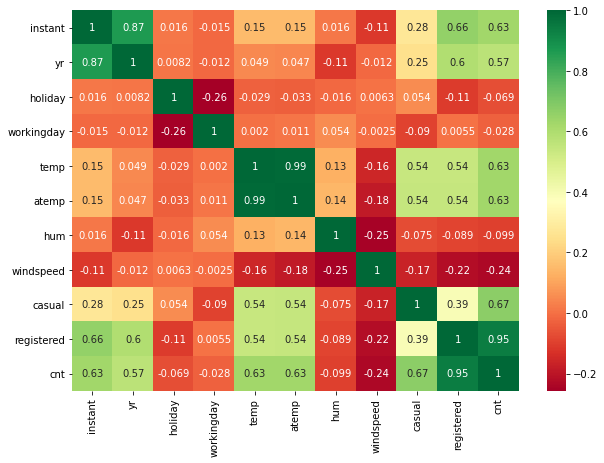

In [33]:
# Plotting correlation heat map
plt.figure(figsize=(10,7))
sns.heatmap(bike.corr(), annot=True, cmap='RdYlGn')

###### Infers -
- It shows that only Year, temp, atemp has a strong positive correlation with count.
- weathersit, windspeed and little bit humidity and holiday affects negatively.

## Preparing the data

In [34]:
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [35]:
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [36]:
# # Creating dummy for mnth
# mnth_dummy = pd.get_dummies(bike['mnth'], drop_first=True)
# mnth_dummy.head()

In [37]:
# # Creating dummy for weathersit
# weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first=True)
# weathersit_dummy.head()

In [38]:
# Creating dummy for season
season_dummy = pd.get_dummies(bike['season'], drop_first=True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
# Creating dummy for mnth
mnth_dummy = pd.get_dummies(bike['mnth'], drop_first=True)
mnth_dummy.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [40]:
# Creating dummy for weathersit
weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first=True)
weathersit_dummy.head()

,Clear,Light Snow
0,0,0
1,0,0
2,1,0
3,1,0
4,1,0


In [41]:
# Creating dummy for weekdays
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first=True)
weekday_dummy.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [42]:
# Concatening with original data
bike = pd.concat([bike, season_dummy, weekday_dummy, mnth_dummy, weathersit_dummy], axis=1)

In [43]:
# dropping column
bike = bike.drop(['season','weekday', 'weathersit', 'mnth'], axis = 1)


# mapping yr column
year_map = {2018:0, 2019:1}
bike['yr'] = bike.yr.map(year_map)

# Dropping instant column
bike = bike.drop('instant', axis = 1)

In [44]:
bike.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Clear,Light Snow
0,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


## Splitting data into train test

In [45]:
# Libraries
from sklearn.model_selection import train_test_split

In [46]:
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=100)

### Rescalling the features (MinMaxScaler)

In [47]:
# Importing Libraries
from sklearn.preprocessing import MinMaxScaler

In [48]:
# Instantiate an object
scaler = MinMaxScaler()

In [49]:
# Creating list of numeric column
bike.columns
 
num_var =['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [50]:
# Fit data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Clear,Light Snow
576,2019-07-31,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
426,2019-03-03,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
728,2019-12-30,1,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
482,2019-04-28,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,2018-04-22,0,0,0,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Clear,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,0.243137,0.247059,0.247059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.625490,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,0.429398,0.431725,0.431725,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.484471,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

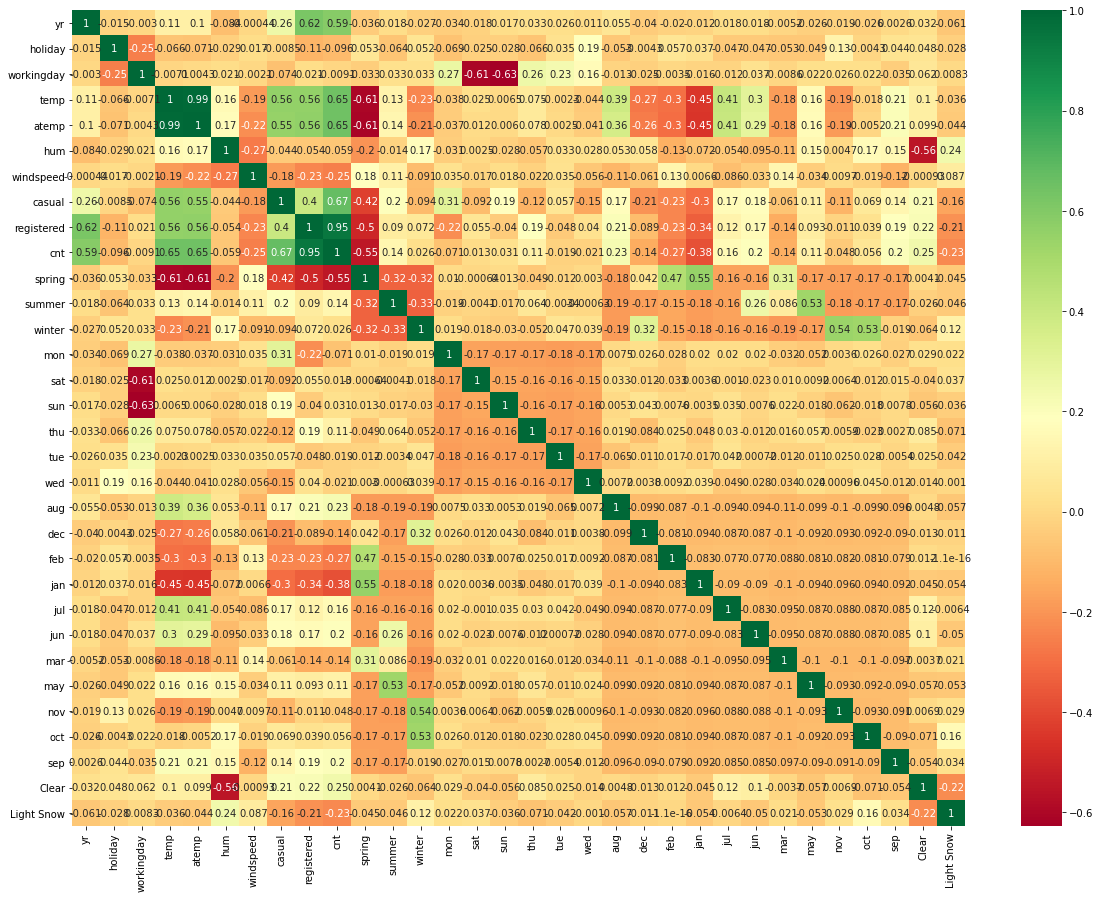

In [52]:
# Plotting correlation heat map
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn')

As we might have noticed, Temperature and year seems to the correlated to price the most.

### Dividing into X and Y sets for the model building

In [53]:
X_train = df_train
y_train = df_train.pop('cnt')

## Building a linear model

In [54]:
# import statsmodels.api as sm

# # Add a constant
# X_train_lm = sm.add_constant(X_train[['temp']])

# # Create a first fitted model
# lr = sm.OLS(y_train, X_train_lm).fit()

In [55]:
# # Check the parameters obtained
# lr.params

In [56]:
# # Let's visualise the data with a scatter plot and the fitted regression line
# plt.scatter(X_train_lm.iloc[:, 1], y_train)
# plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
# plt.show()

In [57]:
# # Print a summary of the linear regression model obtained
# print(lr.summary())

##### Adding another variable¶
The R-squared value obtained is 0.283. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. atemp

In [58]:
# # Assign all the feature variables to X
# X_train_lm = X_train[['atemp','spring','weathersit','hum', 'windspeed',
#                      'winter']]

# # Build a linear model

# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train_lm)

# lr = sm.OLS(y_train, X_train_lm).fit()

# lr.params

In [59]:
# # Check the summary
# print(lr.summary())

### Adding all the variables to the model

In [60]:
# X_train.columns

In [61]:
# #Build a linear model

# import statsmodels.api as sm
# X_train_lm = sm.add_constant(X_train)

# lr_1 = sm.OLS(y_train, X_train_lm).fit()

# round(lr_1.params, 4)

In [62]:
# print(lr_1.summary())

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [63]:
# # Check for the VIF values of the feature variables. 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# vif = pd.DataFrame()
# vif['Features'] = X_train.columns
# vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

### Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, weathersit as it has a very high p-value of 0.858. Let's go ahead and drop this variables

In [65]:
# # Dropping highly correlated variables and insignificant variables

# X = X_train.drop(['weathersit', 'temp', 'yr', 'workingday', 'mon', 'atemp', 
#                   'mnth', 'hum', 'sun', 'registered', 'casual', "tue", 'wed',
#                  'sat', 'holiday'],
#                  1,)

# # Build a third fitted model
# X_train_lm = sm.add_constant(X)

# lr_2 = sm.OLS(y_train, X_train_lm).fit()

# # Print the summary of the model
# print(lr_2.summary())

In [66]:
# # Calculate the VIFs again for the new model

# vif = pd.DataFrame()
# vif['Features'] = X.columns
# vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [67]:
col = ['spring','summer', 'winter','mon','sat','sun','thu','tue','wed','aug','dec','feb','jan','jul','jun','mar','may',
       'nov','oct','sep','Clear','Light Snow']

bike[col]=bike[col].astype('int64')

In [68]:
bike.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Clear,Light Snow
0,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [69]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   yr          730 non-null    int64         
 2   holiday     730 non-null    int64         
 3   workingday  730 non-null    int64         
 4   temp        730 non-null    float64       
 5   atemp       730 non-null    float64       
 6   hum         730 non-null    float64       
 7   windspeed   730 non-null    float64       
 8   casual      730 non-null    int64         
 9   registered  730 non-null    int64         
 10  cnt         730 non-null    int64         
 11  spring      730 non-null    int64         
 12  summer      730 non-null    int64         
 13  winter      730 non-null    int64         
 14  mon         730 non-null    int64         
 15  sat         730 non-null    int64         
 16  sun         730 non-null  

## Variable Selection Using RFE (Recursive Features Elimination

In [70]:
# Dropping Registered and Casual columns as it's presense does not make sense in the presence of 
X_train = X_train.drop(['registered', 'casual', 'dteday'] ,1)

In [71]:
# Importing Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [72]:
X_train.shape

(510, 29)

In [73]:
# Running RFE with 11 number of variables

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 11)  #RFE
rfe = rfe.fit(X_train, y_train)

In [74]:
# Listing top 11 Features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 12),
 ('sat', False, 9),
 ('sun', False, 10),
 ('thu', False, 18),
 ('tue', False, 11),
 ('wed', False, 15),
 ('aug', False, 14),
 ('dec', False, 5),
 ('feb', False, 6),
 ('jan', False, 3),
 ('jul', True, 1),
 ('jun', False, 16),
 ('mar', False, 19),
 ('may', False, 13),
 ('nov', False, 4),
 ('oct', False, 17),
 ('sep', True, 1),
 ('Clear', False, 2),
 ('Light Snow', True, 1)]

In [75]:
# Selected Columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jul', 'sep', 'Light Snow'],
      dtype='object')

In [76]:
# Assign all the feature variables to X
X_train_lm = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jul', 'sep', 'Light Snow']]

# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.319012
yr            0.226977
holiday      -0.091073
temp          0.563966
hum          -0.281328
windspeed    -0.200429
spring       -0.047273
summer        0.056044
winter        0.108030
jul          -0.056133
sep           0.083467
Light Snow   -0.193962
dtype: float64

In [77]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.92e-186
Time:                        11:05:34   Log-Likelihood:                 496.69
No. Observations:                 510   AIC:                            -969.4
Df Residuals:                     498   BIC:                            -918.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3190      0.035      9.217      0.0

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.46
6,spring,4.98
3,temp,3.47
8,winter,3.43
7,summer,2.62
9,jul,1.48
10,sep,1.30
4,hum,1.27
5,windspeed,1.17
11,Light Snow,1.11


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [80]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

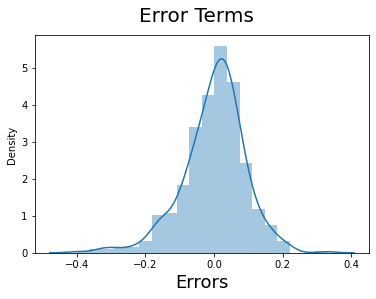

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<AxesSubplot:>

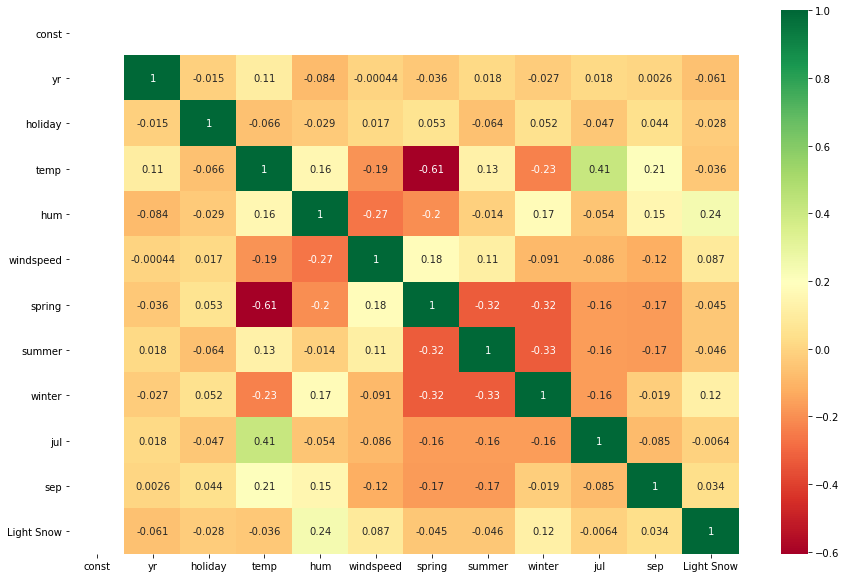

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_lm.corr(), annot=True, cmap='RdYlGn')

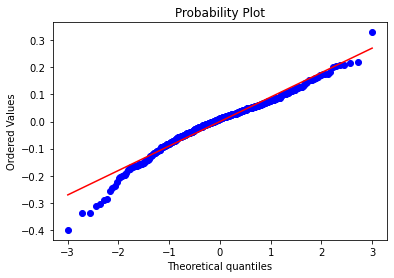

In [99]:
import numpy as np 
import pylab 
import scipy.stats as stats

res = (y_train - y_train_price)
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

In [109]:
# import numpy and statsmodels
import numpy as np
from statsmodels.stats.stattools import durbin_watson
  
# Using statsmodels.durbin_watson() method
dur_wat = durbin_watson(res)
  
print(dur_wat)

2.011457425778332


## Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final.

##### Applying the scaling on the test sets

In [82]:
df_test.head(3)

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Clear,Light Snow
184,2018-04-07,0,1,0,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
535,2019-06-20,1,0,1,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
299,2018-10-27,0,0,0,19.270000,22.85230,81.2917,13.250121,240,2419,2659,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [83]:
# df_test.summer.value_counts()
# df_test.holiday.value_counts()
# df_test.workingday.value_counts()
df_test.mon.value_counts()


0    194
1     26
Name: mon, dtype: int64

In [84]:
df_test.shape

(220, 33)

In [85]:
df_test.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'spring', 'summer',
       'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'Clear',
       'Light Snow'],
      dtype='object')

In [86]:
num_vars = ['temp', 'atemp', 'hum','windspeed', 'casual', 'registered','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.describe()



# ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
#        'winter', 'jul', 'sep', 'Light Snow']

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,Clear,Light Snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.266436,0.529076,0.522154,0.254545,0.263636,0.236364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.654545,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.216751,0.219300,0.219163,0.436599,0.441609,0.425817,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.476601,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.102484,0.359190,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.225236,0.527577,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.361780,0.667088,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [87]:
X_test = df_test
y_test = df_test.pop('cnt')

In [88]:
# Adding constant variable to test dataframe
X_test_model = sm.add_constant(X_test)

In [89]:
X_test_model.columns

Index(['const', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'spring', 'summer',
       'winter', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'Clear',
       'Light Snow'],
      dtype='object')

In [90]:
# Creating X_test_model dataframe by dropping variables from X_test_model

X_test_model = X_test_model.drop(['dteday', 'workingday', 'atemp',
                             'casual', 'registered', 'mon', 'sat',
                             'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb',
                            'jan','jun', 'mar', 'may', 'nov', 'oct', 'Clear'],
                        axis = 1)

In [91]:
# Making predictions using the final model

y_pred_model = lr.predict(X_test_model)

## Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

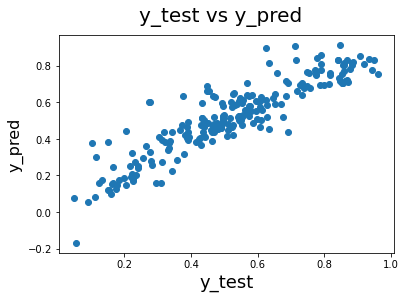

In [92]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_model)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

##### Evaluation using R_Square

In [93]:
# Library
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_pred_model)

0.8135064751542388

81% score is should be enough, I guess!!

                                                -- End--